     Dress_ID    Style    Price  Rating Size  Season NeckLine SleeveLength  \
0  1006032852     Sexy      Low     4.6    M  Summer   o-neck    sleevless   
1  1212192089   Casual      Low     0.0    L  Summer   o-neck        Petal   
2  1190380701  vintage     High     0.0    L  Automn   o-neck         full   
3   966005983    Brief  Average     4.6    L  Spring   o-neck         full   
4   876339541     cute      Low     4.5    M  Summer   o-neck    butterfly   

  waiseline       Material FabricType  Decoration Pattern Type  Recommendation  
0    empire            NaN    chiffon     ruffles       animal               1  
1   natural     microfiber        NaN     ruffles       animal               0  
2   natural       polyster        NaN         NaN        print               0  
3   natural           silk    chiffon  embroidary        print               1  
4   natural  chiffonfabric    chiffon         bow          dot               0  
<class 'pandas.core.frame.DataFrame'>
RangeIn

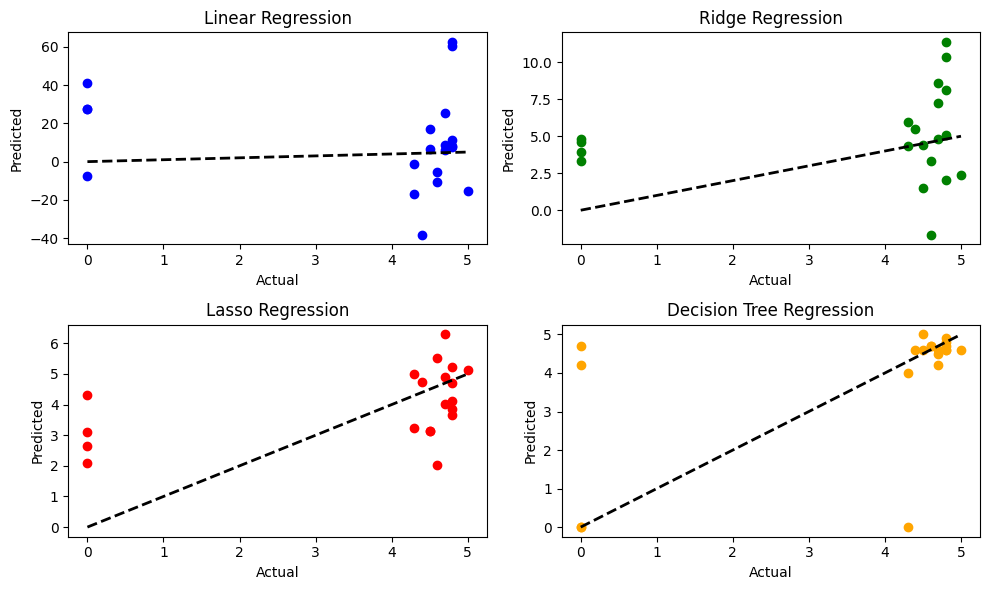

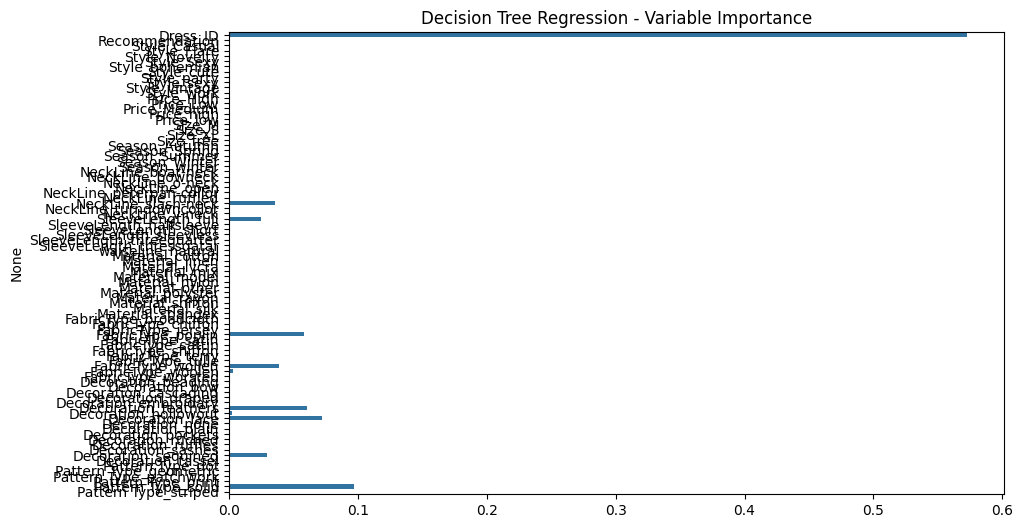

In [1]:
# Importing  libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Dresses Attribute Sales Dataset
data = pd.read_csv('/content/Attribute DataSet ML.csv')

# Data Exploration and Preprocessing
print(data.head())
print(data.info())

# Drop any missing values if necessary
data.dropna(inplace=True)

# Select variables for encoding
X_columns = ['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration', 'Pattern Type']

# Set the target variable
y_column = 'Recommendation'
# Split the dataset into features (X) and labels (y)
X = data[X_columns]
y = data[y_column]
'''# Feature Engineering
X = data.drop(columns=['Style'])  # Features
y = data['Recommendation']  # Target variable'''

# Preprocess the data: Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the dataset into features (X) and labels (y)
X = data_encoded.drop(columns=['Rating'])
y = data_encoded['Rating']


'''
# Convert text data into numerical feature vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for demonstration
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)'''

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_pred = lin_reg.predict(X_test_scaled)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
ridge_reg_pred = ridge_reg.predict(X_test_scaled)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_pred = lasso_reg.predict(X_test_scaled)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)
dt_reg_pred = dt_reg.predict(X_test_scaled)

# Evaluation
def evaluate_regression(model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model} Model MSE: {mse}")
    print(f"{model} Model R-squared: {r2}")
print("Evaluation for Regression:")
evaluate_regression("Linear Regression", y_test, lin_reg_pred)
evaluate_regression("Ridge Regression", y_test, ridge_reg_pred)
evaluate_regression("Lasso Regression", y_test, lasso_reg_pred)
evaluate_regression("Decision Tree Regression", y_test, dt_reg_pred)

# Explanation
# Discuss the performance of regression algorithms and their implications for predicting dress sales.
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, lin_reg_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot Ridge Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, ridge_reg_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot Lasso Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, lasso_reg_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot Decision Tree Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, dt_reg_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Plotting variable importance for Decision Tree Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=dt_reg.feature_importances_, y=X.columns)
plt.title('Decision Tree Regression - Variable Importance')
plt.show()
